In [72]:
import pandas as pd
import numpy as np
df=pd.read_csv("Social_Network_Ads.csv")

In [73]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [74]:
x=df.iloc[:,0:-1]
y = df.iloc[:,2:]

<Axes: ylabel='Age'>

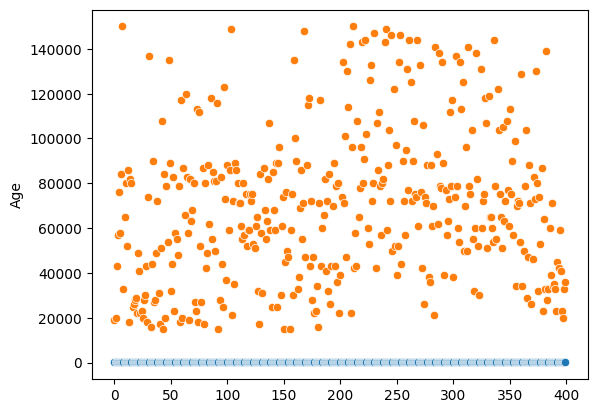

In [75]:
import seaborn as sns
sns.scatterplot(df.iloc[:,0])
sns.scatterplot(df.iloc[:,1])

In [76]:
df.iloc[:,0]

0      19
1      35
2      26
3      27
4      19
       ..
395    46
396    51
397    50
398    36
399    49
Name: Age, Length: 400, dtype: int64

In [77]:
df.iloc[:,1]

0      19000
1      20000
2      43000
3      57000
4      76000
       ...  
395    41000
396    23000
397    20000
398    33000
399    36000
Name: EstimatedSalary, Length: 400, dtype: int64

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [80]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [81]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [82]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               384       
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


In [84]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 24ms/step - loss: 870.2611 - accuracy: 0.5031 - val_loss: 627.5583 - val_accuracy: 0.6000
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 315.4671 - accuracy: 0.5469 - val_loss: 140.1724 - val_accuracy: 0.4000
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 281.2841 - accuracy: 0.5219 - val_loss: 699.7171 - val_accuracy: 0.4000
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 404.6758 - accuracy: 0.5406 - val_loss: 508.4236 - val_accuracy: 0.4000
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 257.3791 - accuracy: 0.4719 - val_loss: 22.2101 - val_accuracy: 0.6000
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 146.8367 - accuracy: 0.4906 - val_loss: 279.6096 - val_accuracy: 0.6000
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 174.1728 - accuracy: 0.5094 - val_loss: 26.8172 - val_acc

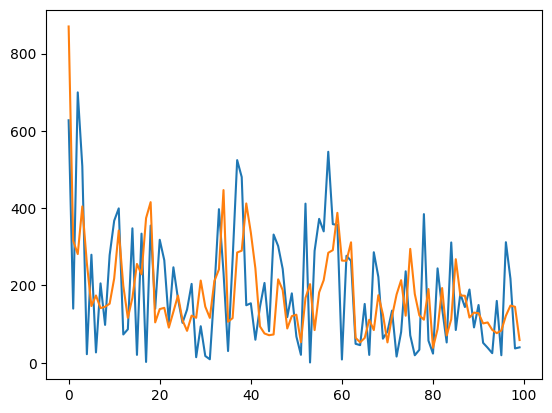

In [85]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'])
plt.plot(history.history["loss"])

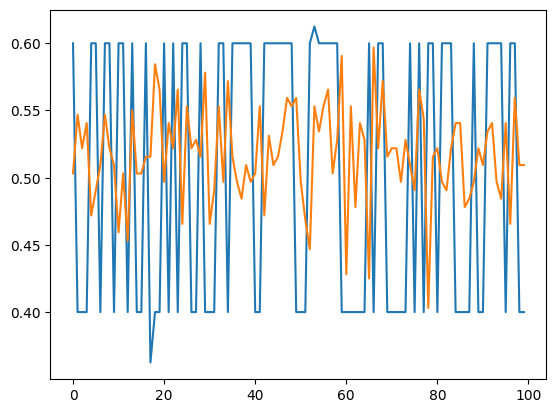

In [86]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.plot(history.history["accuracy"])

In [58]:
# Applying scaling

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
model=Sequential()

model.add(Dense(128,activation="relu",input_dim=2))
model.add(Dense(1,activation="sigmoid"))

In [65]:
model.compile(optimizer="adam",metrics=["accuracy"],loss="binary_crossentropy")

In [66]:
history=model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 22ms/step - loss: 0.6477 - accuracy: 0.7656 - val_loss: 0.6144 - val_accuracy: 0.7750
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5972 - accuracy: 0.7844 - val_loss: 0.5631 - val_accuracy: 0.7875
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5538 - accuracy: 0.8125 - val_loss: 0.5201 - val_accuracy: 0.7875
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5159 - accuracy: 0.8188 - val_loss: 0.4851 - val_accuracy: 0.7875
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4845 - accuracy: 0.8219 - val_loss: 0.4550 - val_accuracy: 0.7875
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 0.4564 - accuracy: 0.8188 - val_loss: 0.4285 - val_accuracy: 0.7875
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4309 - accuracy: 0.8281 - val_loss: 0.4062 - val_accuracy: 0.8125
Epoch 8/100

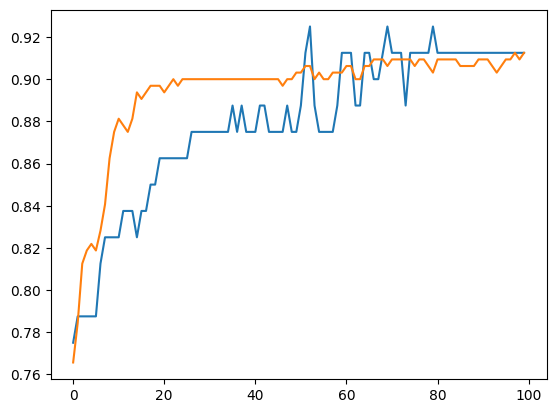

In [69]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.plot(history.history["accuracy"])

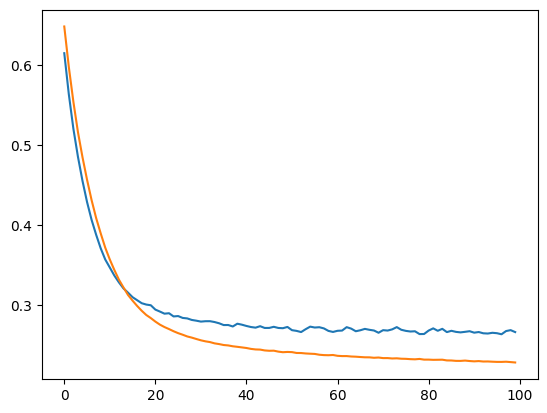

In [70]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'])
plt.plot(history.history["loss"])